Link to Colab environment:
https://colab.research.google.com/drive/1ax-bAeL7NWqQoq-S-KE_WkCQ1xFbU71U?usp=sharing

In [ ]:
#import necessary libraries
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim
from tabulate import tabulate
import matplotlib

In [ ]:
#download CIFAR10 dataset
train_set = torchvision.datasets.CIFAR10(
root="./",
download=True,
train=True,
transform=transforms.Compose([transforms.ToTensor()]),
)
test_set = torchvision.datasets.CIFAR10(
root="./",
download=True,
train=False,
transform=transforms.Compose([transforms.ToTensor()]),
)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
#get train_set mean and std
train_mean = train_set.data.mean(axis=(0,1,2))/255
train_std = train_set.data.std(axis=(0,1,2))/255
#print
print("train_mean: ", train_mean)
print("train_std: ", train_std)

train_mean:  [0.49139968 0.48215841 0.44653091]
train_std:  [0.24703223 0.24348513 0.26158784]


Standardization (or normalization) is a common data preprocessing technique that rescales the features of a dataset so that they have zero mean and unit variance.

In the case of MNIST and CIFAR data, standardization is useful for several reasons:

The pixel values of the images in MNIST and CIFAR have a range from 0 to 255, which can result in numerical instability and slower convergence during training. Standardization scales the input data to a similar range, which can help to avoid these issues.

The standardization process helps to remove the differences in scale that exist between different features. In MNIST and CIFAR, this means that the standardization process can help to reduce the effect of differences in the intensity of the pixels on the overall classification performance.

Standardization can help to improve the performance of some machine learning algorithms by ensuring that all input features are on a similar scale, which can make it easier for the algorithm to find patterns in the data.

Overall, standardizing the MNIST and CIFAR data can help to improve the training stability and performance of the fully connected neural network.

In [ ]:
#download CIFAR10 dataset with normalization
train_set = torchvision.datasets.CIFAR10(
root="./",
download=True,
train=True,
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize(train_mean, train_std)]),
)
test_set = torchvision.datasets.CIFAR10(
root="./",
download=True,
train=False,
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize(train_mean, train_std)]),
)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Task 1 
class Net(nn.Module):
    def __init__(self, dim, nclass, width, depth):
        super().__init__()
        self.dim = dim
        self.nclass = nclass
        self.width = width
        self.depth = depth
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(dim, width)
        self.linear2 = nn.Linear(width, width)
        self.relu = nn.ReLU()
        self.linear3 = nn.Linear(width, nclass)
    def forward(self, input):
        output = self.flatten(input)
        output = self.linear1(output)
        output = self.relu(output)
        for i in range(self.depth-1):
            output = self.linear2(output)
            output = self.relu(output)
        output = self.linear3(output)
        return output

In [ ]:
# Task 2
def load_data(batch_size, train_set, test_set):
    trainloader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
    testloader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True)
    return trainloader, testloader

In [ ]:
# Task 3
def train_epoch(trainloader, net, optimizer, criterion):
    for data in trainloader:
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    return loss

In [ ]:
# Task 4
def test_epoch(testloader, net, criterion):
    net.eval()
    total_loss = 0.0
    total_error = 0.0
    num_samples = 0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_error += (predicted != labels).sum().item()
            num_samples += inputs.size(0)
    avg_loss = total_loss / num_samples
    error_rate = total_error / num_samples
    return avg_loss, error_rate

In [ ]:
# Task 5
# Define hyperparameters
batch_size = 64
dim = 3072
nclass = 10
width = 64
depth = 4
lr = 0.001
n_epochs = 10
# Define model, criterion, and optimizer
net = Net(dim=dim, nclass=nclass, width=width, depth=depth)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=lr)
# Load CIFAR10 dataset
trainloader, testloader = load_data(batch_size=batch_size,train_set=test_set, test_set=test_set)
# Train and test the model for n_epochs
for epoch in range(1, n_epochs+1):
    # Train for one epoch
    train_loss = train_epoch(trainloader=trainloader, net=net, optimizer=optimizer, criterion=criterion)
    # Test for one epoch
    test_loss, test_err = test_epoch(testloader=testloader, net=net, criterion=criterion)
    # Print the results
    print(f'Epoch: {epoch:03} | Train Loss: {train_loss:.04f} | Test Loss: {test_loss:.04f} | Test Error: {test_err:.04f}')

Epoch: 001 | Train Loss: 1.3354 | Test Loss: 1.6658 | Test Error: 0.5918
Epoch: 002 | Train Loss: 1.3881 | Test Loss: 1.5682 | Test Error: 0.5570
Epoch: 003 | Train Loss: 1.1761 | Test Loss: 1.4033 | Test Error: 0.4920
Epoch: 004 | Train Loss: 1.1142 | Test Loss: 1.3645 | Test Error: 0.4845
Epoch: 005 | Train Loss: 2.0012 | Test Loss: 1.2693 | Test Error: 0.4420
Epoch: 006 | Train Loss: 1.2770 | Test Loss: 1.1907 | Test Error: 0.4201
Epoch: 007 | Train Loss: 1.2148 | Test Loss: 1.1291 | Test Error: 0.3867
Epoch: 008 | Train Loss: 1.5478 | Test Loss: 1.1034 | Test Error: 0.3913
Epoch: 009 | Train Loss: 1.2723 | Test Loss: 1.0087 | Test Error: 0.3517
Epoch: 010 | Train Loss: 1.0126 | Test Loss: 0.9322 | Test Error: 0.3217


In [ ]:
#download MNIST dataset
train_set = torchvision.datasets.MNIST(
root="./",
download=True,
train=True,
transform=transforms.Compose([transforms.ToTensor()]),
)
test_set = torchvision.datasets.MNIST(
root="./",
download=True,
train=False,
transform=transforms.Compose([transforms.ToTensor()]),
)

In [ ]:
print(list(train_set.train_data.size()))
print(train_set.train_data.float().mean()/255)
print(train_set.train_data.float().std()/255)


[60000, 28, 28]
tensor(0.1307)
tensor(0.3081)


/Users/nikolaikrokhin/miniconda3/lib/python3.10/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [ ]:
#download MNIST dataset with normalization
train_set = torchvision.datasets.MNIST(
root="./",
download=True,
train=True,
transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]),
)
test_set = torchvision.datasets.MNIST(
root="./",
download=True,
train=False,
transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]),
)

In [ ]:
# Task 6
# Set seed
torch.manual_seed(int("01724711"))
np.random.seed(int("01724711"))
# Define hyperparameters
batch_size = 128
dim = 28*28
nclass = 10
width = 256
lr = 0.001
n_epochs = 20
# Train and test the model for different depths
depths = [1, 5, 10]
# Define lists to store the results
train_losses = [[] for _ in range(len(depths))]
test_losses = [[] for _ in range(len(depths))]
test_errors = [[] for _ in range(len(depths))]
for i, depth in enumerate(depths):
    # Define the network
    net = Net(dim, nclass, width, depth)
    # Define the optimizer and criterion
    optimizer = optim.Adam(net.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()
    # Load the data
    trainloader, testloader = load_data(batch_size, train_set=train_set, test_set=test_set)
    # Train and test the model for n_epochs
    for epoch in range(1, n_epochs+1):
        # Train for one epoch
        train_loss = train_epoch(trainloader, net, optimizer, criterion)
        # Test for one epoch
        test_loss, test_err = test_epoch(testloader, net, criterion)
        # Print the results for this epoch
        print(f'Epoch: {epoch:03} | Depth: {depth:02} | Train Loss: {train_loss:.04f} | Test Loss: {test_loss:.04f} | Test Error: {test_err:.04f}')
        # Record the train and test losses and test errors
        train_losses[i].append(train_loss)
        test_losses[i].append(test_loss)
        test_errors[i].append(test_err)

Epoch: 001 | Depth: 01 | Train Loss: 0.1467 | Test Loss: 0.1315 | Test Error: 0.0381
Epoch: 002 | Depth: 01 | Train Loss: 0.0771 | Test Loss: 0.0952 | Test Error: 0.0294
Epoch: 003 | Depth: 01 | Train Loss: 0.0752 | Test Loss: 0.0771 | Test Error: 0.0238
Epoch: 004 | Depth: 01 | Train Loss: 0.0312 | Test Loss: 0.0693 | Test Error: 0.0224
Epoch: 005 | Depth: 01 | Train Loss: 0.0264 | Test Loss: 0.0724 | Test Error: 0.0217
Epoch: 006 | Depth: 01 | Train Loss: 0.0130 | Test Loss: 0.0722 | Test Error: 0.0216
Epoch: 007 | Depth: 01 | Train Loss: 0.0732 | Test Loss: 0.0679 | Test Error: 0.0212
Epoch: 008 | Depth: 01 | Train Loss: 0.0143 | Test Loss: 0.0674 | Test Error: 0.0199
Epoch: 009 | Depth: 01 | Train Loss: 0.0322 | Test Loss: 0.0688 | Test Error: 0.0189
Epoch: 010 | Depth: 01 | Train Loss: 0.0169 | Test Loss: 0.0743 | Test Error: 0.0214
Epoch: 011 | Depth: 01 | Train Loss: 0.0137 | Test Loss: 0.0741 | Test Error: 0.0193
Epoch: 012 | Depth: 01 | Train Loss: 0.0516 | Test Loss: 0.0704 |

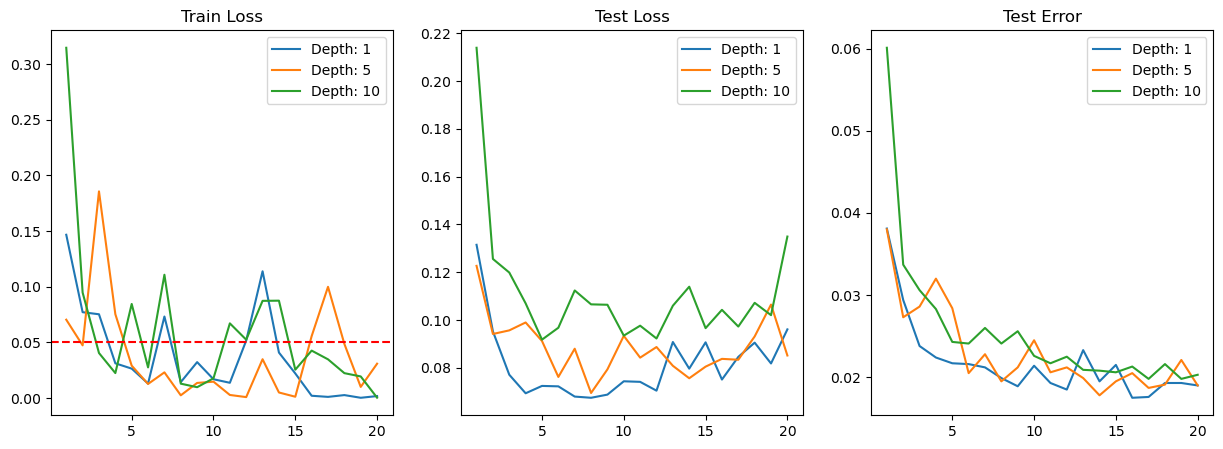

In [ ]:
#plot three graphs of the history on same figure for train loss, test loss and test error against epochs with depths as labels
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, depth in enumerate(depths):
    ax[0].plot(range(1, n_epochs+1),[float(n) for n in train_losses[i]], label=f'Depth: {depth}')
    ax[1].plot(range(1, n_epochs+1),[float(n) for n in test_losses[i]], label=f'Depth: {depth}')
    ax[2].plot(range(1, n_epochs+1),[float(n) for n in test_errors[i]], label=f'Depth: {depth}')
ax[0].axhline(y=0.05, color='r', linestyle='--')
ax[0].set_title('Train Loss')
ax[1].set_title('Test Loss')
ax[2].set_title('Test Error')
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

In [ ]:
#make table of these results
table = []
for i in range(len(depths)):
    table.append([depths[i], train_losses[i][-1], test_losses[i][-1]])

headers = ["Depth", "Train Loss", "Test Loss"]
print(tabulate(table, headers=headers, floatfmt=".4f", tablefmt="fancy_grid"))

╒═════════╤══════════════╤═════════════╕
│   Depth │   Train Loss │   Test Loss │
╞═════════╪══════════════╪═════════════╡
│       1 │       0.0017 │      0.0961 │
├─────────┼──────────────┼─────────────┤
│       5 │       0.0308 │      0.0851 │
├─────────┼──────────────┼─────────────┤
│      10 │       0.0003 │      0.1349 │
╘═════════╧══════════════╧═════════════╛


Table of results:

| Depth | Train Loss | Test Loss |
|-------|------------|-----------|
| 1     | 0.0017     | 0.0961    |
| 5     | 0.0308     | 0.0851    |
| 10    | 0.0003     | 0.1349    |

Report hyperparameter values:

| Hyperparameter | Value |
|----------------|-------|
| Batch Size     | 128   |
| Width          | 256   |
| Learning Rate  | 0.001 |
| Epochs         | 20    |


As we can see, the deeper network (with 10 layers) achieves the lowest train loss but also the highest test loss. This suggests that the deeper network is overfitting the data. On the other hand, the shallower network (with 1 layer) achieves a higher train loss but a lower test loss, indicating that it is generalizing better to unseen data. The network with 5 layers achieves the best performance on the test data. It is the perfect balance between overfitting and underfitting. 

The overfitting of the deeper network may be due to the fact that it has many more parameters than the shallower network, which makes it more flexible but also more prone to overfitting. To address this issue, we could try to involve some regularization techniques (e.g., weight decay, dropout) or early stopping to prevent overfitting. Additionally, we could try reducing the learning rate to make it easier for the deeper network to converge.

The results of our experiments suggest that deep neural networks do indeed tend to overfit on the data. We can see from the table that the training loss decreases as the depth of the network increases, while the test loss actually increases after a certain point. This suggests that the deeper network is fitting the training data more closely, but is not generalizing as well to new, unseen data.

When it comes to training deeper neural networks, the non-convexity of the loss landscape can indeed play a significant role in determining whether the network converges and how long it takes to do so.

The non-convexity of the loss landscape means that the optimization problem of finding the weights that minimize the loss function is not convex, which makes it more challenging to optimize. In other words, the loss function has multiple local minima, and the optimization algorithm may get stuck in one of these local minima instead of finding the global minimum.

Deeper neural networks tend to have more complex loss landscapes, which can make optimization more challenging. One of the reasons for this is that the gradients of the loss function with respect to the weights become smaller and smaller as they propagate through the layers, a phenomenon known as the vanishing gradient problem. This can make it difficult to update the weights in the deeper layers, leading to slower convergence or even convergence to a suboptimal solution.

To overcome these challenges, researchers have developed various techniques to facilitate training deeper neural networks, such as weight initialization methods, normalization techniques, skip connections, and residual connections. These techniques can help alleviate the vanishing gradient problem and stabilize the training process.

Another way to deal with non-convexity is to use stochastic optimization algorithms that explore the loss landscape more effectively than deterministic optimization algorithms. For example, stochastic gradient descent (SGD) with momentum or adaptive learning rate methods such as Adam can help the optimization algorithm escape from local minima and find better solutions.

In summary, the non-convexity of the loss landscape can make training deeper neural networks more challenging, but various techniques and optimization algorithms can help alleviate these challenges and improve convergence.

In our experiments, we used the Adam optimizer, which is known to be more robust to these issues compared to other optimization algorithms such as SGD. However, it is possible that with a different optimizer or learning rate schedule, we could achieve better results with deeper networks.

Overall, the results suggest that while deep neural networks can be more powerful than shallow ones, they can also be more difficult to train and more prone to overfitting. When designing a neural network, it is important to strike a balance between model complexity and generalization performance, and to use techniques such as early stopping, regularization, and model selection to avoid overfitting.

In [ ]:
# Task 7
# Set seed
torch.manual_seed(int("01724711"))
np.random.seed(int("01724711"))
# Define hyperparameters
batch_size = 64
dim = 28*28
nclass = 10
width = 256
depth = 1
n_epochs = 40
# Train and test the model for different learning rates
learning_rates = [0.001, 0.01, 0.1]
# Define lists to store the results
train_losses = [[] for _ in range(len(learning_rates))]
test_losses = [[] for _ in range(len(learning_rates))]
test_errors = [[] for _ in range(len(learning_rates))]
for i, lr in enumerate(learning_rates):
    # Define the network
    net = Net(dim, nclass, width, depth)
    # Define the optimizer and criterion
    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)
    criterion = nn.CrossEntropyLoss()
    # Load the data
    trainloader, testloader = load_data(batch_size, train_set=train_set, test_set=test_set)
    # Train and test the model for n_epochs
    for epoch in range(1, n_epochs+1):
        # Train for one epoch
        train_loss = train_epoch(trainloader, net, optimizer, criterion)
        # Test for one epoch
        test_loss, test_err = test_epoch(testloader, net, criterion)
        # Print the results for this epoch
        print(f'Epoch: {epoch:03} | Learning Rate: {lr:02} | Train Loss: {train_loss:.04f} | Test Loss: {test_loss:.04f} | Test Error: {test_err:.04f}')
        # Record the train and test losses and test errors
        train_losses[i].append(train_loss)
        test_losses[i].append(test_loss)
        test_errors[i].append(test_err)

Epoch: 001 | Learning Rate: 0.001 | Train Loss: 0.1923 | Test Loss: 0.3143 | Test Error: 0.0908
Epoch: 002 | Learning Rate: 0.001 | Train Loss: 0.3682 | Test Loss: 0.2578 | Test Error: 0.0738
Epoch: 003 | Learning Rate: 0.001 | Train Loss: 0.2101 | Test Loss: 0.2203 | Test Error: 0.0635
Epoch: 004 | Learning Rate: 0.001 | Train Loss: 0.2115 | Test Loss: 0.1953 | Test Error: 0.0569
Epoch: 005 | Learning Rate: 0.001 | Train Loss: 0.0583 | Test Loss: 0.1779 | Test Error: 0.0492
Epoch: 006 | Learning Rate: 0.001 | Train Loss: 0.2275 | Test Loss: 0.1584 | Test Error: 0.0447
Epoch: 007 | Learning Rate: 0.001 | Train Loss: 0.1701 | Test Loss: 0.1458 | Test Error: 0.0423
Epoch: 008 | Learning Rate: 0.001 | Train Loss: 0.1046 | Test Loss: 0.1357 | Test Error: 0.0402
Epoch: 009 | Learning Rate: 0.001 | Train Loss: 0.1493 | Test Loss: 0.1283 | Test Error: 0.0372
Epoch: 010 | Learning Rate: 0.001 | Train Loss: 0.1057 | Test Loss: 0.1204 | Test Error: 0.0341
Epoch: 011 | Learning Rate: 0.001 | Trai

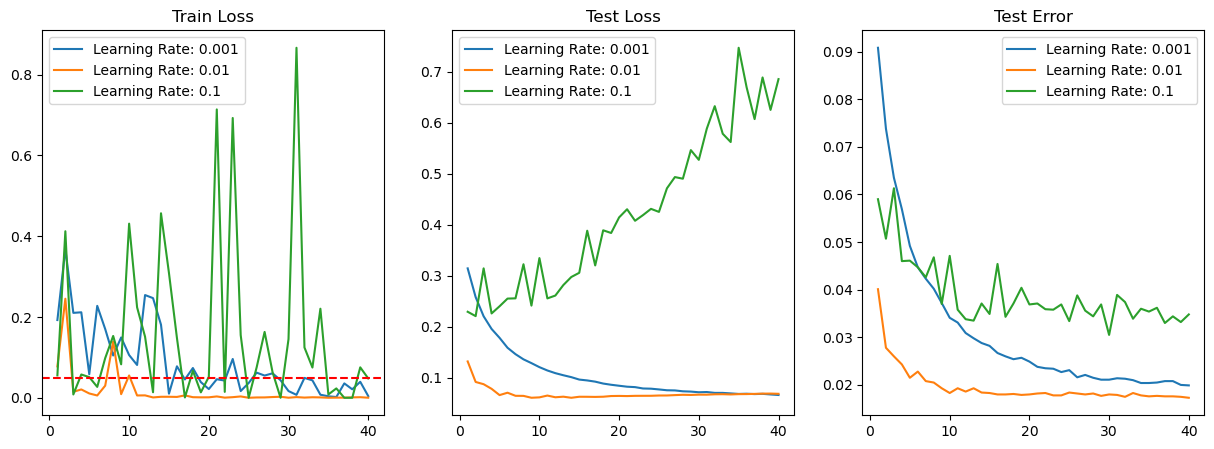

In [ ]:
#plot three graphs on same figure for train loss, test loss and test error against epochs with depths as labels
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, lr in enumerate(learning_rates):
    ax[0].plot(range(1, n_epochs+1),[float(n) for n in train_losses[i]], label=f'Learning Rate: {lr}')
    ax[1].plot(range(1, n_epochs+1),[float(n) for n in test_losses[i]], label=f'Learning Rate: {lr}')
    ax[2].plot(range(1, n_epochs+1),[float(n) for n in test_errors[i]], label=f'Learning Rate: {lr}')
ax[0].axhline(y=0.05, color='r', linestyle='--')
ax[0].set_title('Train Loss')
ax[1].set_title('Test Loss')
ax[2].set_title('Test Error')
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

In [ ]:
#make table of these results
table = []
for i in range(len(learning_rates)):
    table.append([learning_rates[i], train_losses[i][-1], test_losses[i][-1]])
headers = ["Learning Rate", "Train Loss", "Test Loss"]
print(tabulate(table, headers=headers, floatfmt=".4f", tablefmt="fancy_grid"))

╒═════════════════╤══════════════╤═════════════╕
│   Learning Rate │   Train Loss │   Test Loss │
╞═════════════════╪══════════════╪═════════════╡
│          0.0010 │       0.0043 │      0.0657 │
├─────────────────┼──────────────┼─────────────┤
│          0.0100 │       0.0002 │      0.0680 │
├─────────────────┼──────────────┼─────────────┤
│          0.1000 │       0.0479 │      0.6858 │
╘═════════════════╧══════════════╧═════════════╛


Table of results:

| Learning Rate | Train Loss | Test Loss |
|---------------|------------|-----------|
| 0.0010        | 0.0043     | 0.0657    |
| 0.0100        | 0.0002     | 0.0680    |
| 0.1000        | 0.0479     | 0.6858    |

Report hyperparameter values:

| Hyperparameter | Value |
|----------------|-------|
| Batch Size     | 64    |
| Width          | 256   |
| Depth          | 1     |
| Epochs         | 40    |
| Momentum       | 0.9   |

Even when using SGD with momentum, we observe that a learning rate of 0.001 leads to a slow convergence of the model. The training and test loss decrease very slowly, and the test loss is relatively high compared to other learning rates. This indicates that the model is underfitting the data and still needs more iterations to converge to the optimal solution.

When we set the learning rate to 0.01, the model achieves the lowest test loss among the three learning rates. The training loss decreases faster than with a learning rate of 0.001, indicating that the model is learning faster. This suggests that 0.01 is a reasonable learning rate for this problem, and we could further tune this hyperparameter to achieve better results.

When the learning rate is increased significantly to 0.1000, the model learns very fast and over it's history approaches the optimum quicker than the others many times. However, as we see in the history, the train loss has occassional extremely large jumps. This is likely due to the learning rate being too large, causing the optimizer to overshoot the optimal solution and diverge.

When the learning rate is too large, the optimizer takes large steps towards the optimal solution, which can cause it to overshoot and miss the minimum. This can result in the model weights oscillating back and forth, which causes the train loss to increase and decreases the model's ability to generalize to unseen data. This phenomenon is known as "exploding gradients," and it can cause the model to become unstable and fail to converge to an optimal solution., indicating that the model is overfitting the training data and not generalizing well to the test data. This is a typical example of overshooting the minimum, where the model diverges from the optimal solution due to large steps in the parameter space.

Exploding gradients can still happen even when using momentum in the optimization algorithm because momentum is designed to help the optimizer overcome the problem of getting stuck in local minima. However, momentum does not directly address the issue of overshooting the optimal solution.

Momentum works by adding a fraction of the previous gradient direction to the current gradient direction to smooth out the gradient updates and help the optimizer move more efficiently towards the minimum. When the gradients are small and consistent, momentum can help accelerate convergence. However, when the gradients become too large due to a too high learning rate or other reasons, momentum can exacerbate the problem by amplifying the gradients and causing the optimizer to overshoot the minimum.

Therefore, while momentum can help stabilize the optimization process and prevent the optimizer from getting stuck in local minima, it cannot fully eliminate the risk of exploding gradients. To address this issue, other techniques such as gradient clipping can be used to limit the magnitude of the gradients and prevent them from becoming too large.

In conclusion, choosing an appropriate learning rate is important for training neural networks as it directly affects the model's performance. A moderate learning rate generally works well for most problems, while too small or too large learning rates can lead to poor results.

In [ ]:
"""
Task 8: Compare the performance for small and large batch sizes [3
points*] Fix the depth to 1 and fix the width to 64. Use the SGD optimizer (not
Adam) with a learning rate of your choice and with or without momentum. Fill in
the following table and present a plot of the train and test losses as a function of
batch size (include both in the notebook) :
Batch size Train loss Test loss
8
16
32
64
128
256
512
The intuition in deep learning is that noise has a regularising effect on the
learned model. When we use a smaller batch size we increase the amount of noise
that is used in the training process (because in each iteration we’re using a different
dataset over which we compute the loss). This should then result in a smaller
generalisation error. See for example this paper [Keskar et al., 2016]. Do you
observe any similar effect? In terms of computational efficiency, what are the
trade-offs between small and large batches? What happens to the test loss as we
increase the number of batches? What other observations do you have on the batch
size?
* +1 point for being able to obtain some results and having a clear discussion
of the results and +2 points if you manage to find a configuration that indeed
matches the intuition in deep learning that a smaller batch size results in a smaller
generalisation error.
"""
# Task 8
# Set seed
torch.manual_seed(int("01724711"))
np.random.seed(int("01724711"))
# Define hyperparameters
dim = 28*28
nclass = 10
width = 64
depth = 1
lr = 0.01
n_epochs = 40
# Train and test the model for different learning rates
batch_sizes = [8, 16, 32, 64, 128, 256, 512]
# Define lists to store the results
train_losses = [[] for _ in range(len(batch_sizes))]
test_losses = [[] for _ in range(len(batch_sizes))]
test_errors = [[] for _ in range(len(batch_sizes))]
for i, batch_size in enumerate(batch_sizes):
    # Define the network
    net = Net(dim, nclass, width, depth)
    # Define the optimizer and criterion
    optimizer = optim.SGD(net.parameters(), lr=lr ,momentum=0.9)
    criterion = nn.CrossEntropyLoss()
    # Load the data
    trainloader, testloader = load_data(batch_size, train_set=train_set, test_set=test_set)
    # Train and test the model for n_epochs
    for epoch in range(1, n_epochs+1):
        # Train for one epoch
        train_loss = train_epoch(trainloader, net, optimizer, criterion)
        # Test for one epoch
        test_loss, test_err = test_epoch(testloader, net, criterion)
        # Print the results for this epoch
        print(f'Epoch: {epoch:03} | Batch Size: {batch_size:02} | Train Loss: {train_loss:.04f} | Test Loss: {test_loss:.04f} | Test Error: {test_err:.04f}')
        # Record the train and test losses and test errors
        train_losses[i].append(train_loss)
        test_losses[i].append(test_loss)
        test_errors[i].append(test_err)

Epoch: 001 | Batch Size: 08 | Train Loss: 0.0726 | Test Loss: 0.2368 | Test Error: 0.0629
Epoch: 002 | Batch Size: 08 | Train Loss: 0.0002 | Test Loss: 0.2654 | Test Error: 0.0666
Epoch: 003 | Batch Size: 08 | Train Loss: 1.0440 | Test Loss: 0.2049 | Test Error: 0.0466
Epoch: 004 | Batch Size: 08 | Train Loss: 0.6686 | Test Loss: 0.2207 | Test Error: 0.0479
Epoch: 005 | Batch Size: 08 | Train Loss: 0.8006 | Test Loss: 0.2659 | Test Error: 0.0566
Epoch: 006 | Batch Size: 08 | Train Loss: 0.0650 | Test Loss: 0.2687 | Test Error: 0.0494
Epoch: 007 | Batch Size: 08 | Train Loss: 0.0002 | Test Loss: 0.2566 | Test Error: 0.0444
Epoch: 008 | Batch Size: 08 | Train Loss: 0.0010 | Test Loss: 0.2916 | Test Error: 0.0478
Epoch: 009 | Batch Size: 08 | Train Loss: 0.0000 | Test Loss: 0.2775 | Test Error: 0.0458
Epoch: 010 | Batch Size: 08 | Train Loss: 0.0000 | Test Loss: 0.2282 | Test Error: 0.0406
Epoch: 011 | Batch Size: 08 | Train Loss: 0.1646 | Test Loss: 0.2969 | Test Error: 0.0470
Epoch: 012

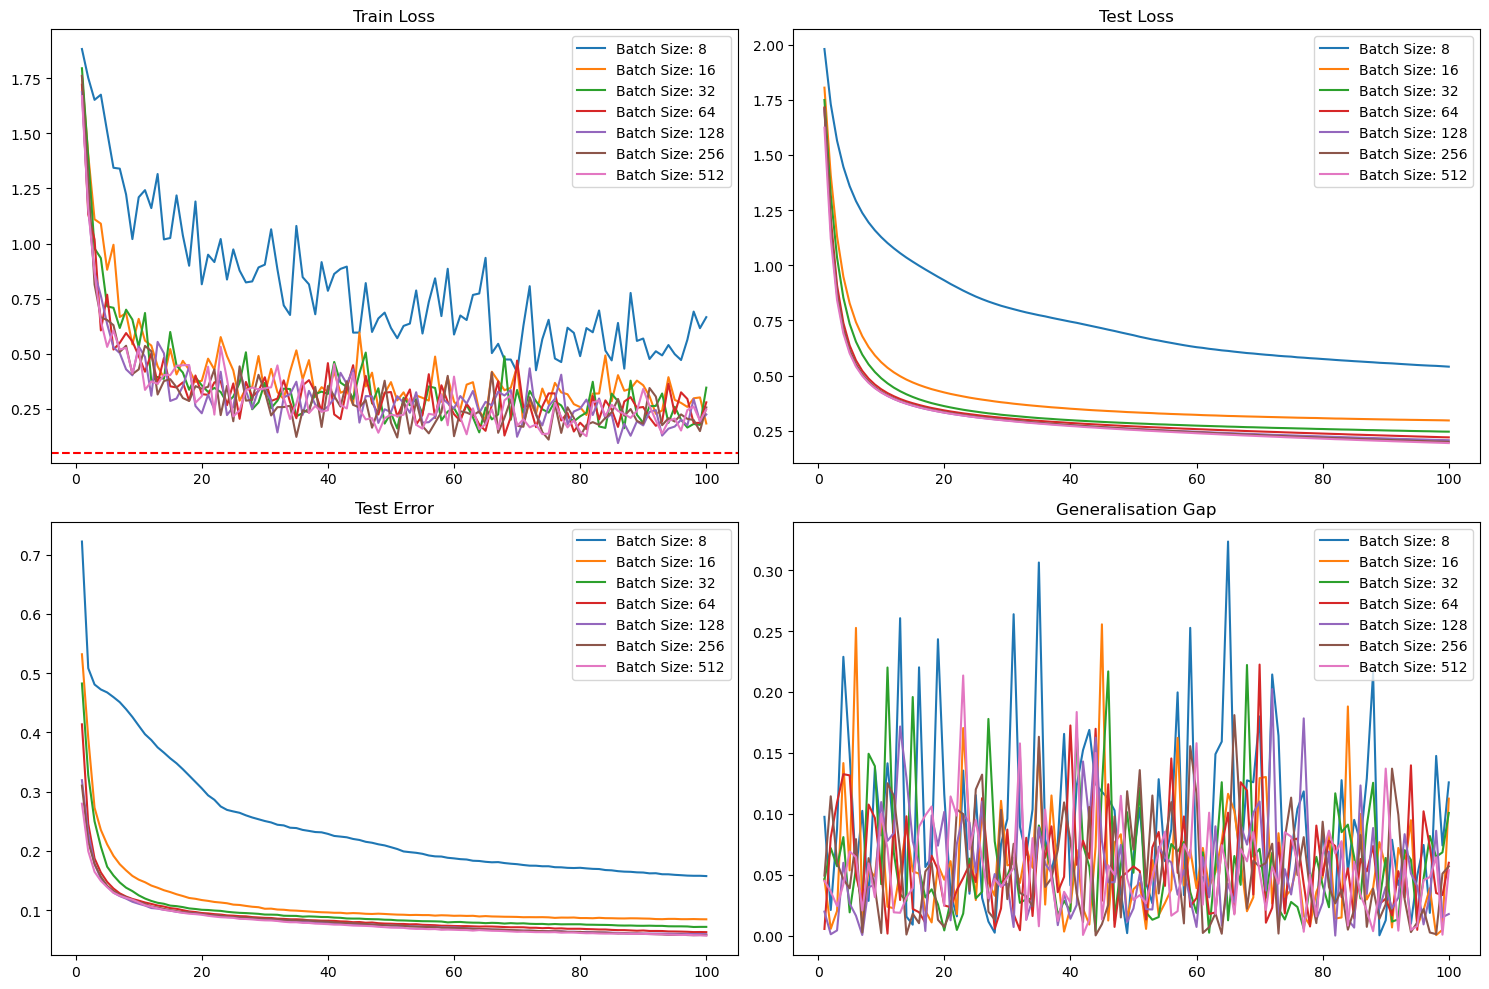

In [ ]:
#plot four graphs on same figure for train loss, test loss and test error and generalisation gap against epochs with depths as labels
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
for i, batch_size in enumerate(batch_sizes):
    ax[0,0].plot(range(1, n_epochs+1),[float(n) for n in train_losses[i]], label=f'Batch Size: {batch_size}')
    ax[0,1].plot(range(1, n_epochs+1),[float(n) for n in test_losses[i]], label=f'Batch Size: {batch_size}')
    ax[1,0].plot(range(1, n_epochs+1),[float(n) for n in test_errors[i]], label=f'Batch Size: {batch_size}')
    ax[1,1].plot(range(1, n_epochs+1),np.abs(np.array([float(n) for n in train_losses[i]])-np.array([float(n) for n in test_losses[i]])), label=f'Batch Size: {batch_size}')
ax[0,0].axhline(y=0.05, color='r', linestyle='--')
ax[0,0].set_title('Train Loss')
ax[0,1].set_title('Test Loss')
ax[1,0].set_title('Test Error')
ax[1,1].set_title('Generalisation Gap')
ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()
plt.tight_layout()

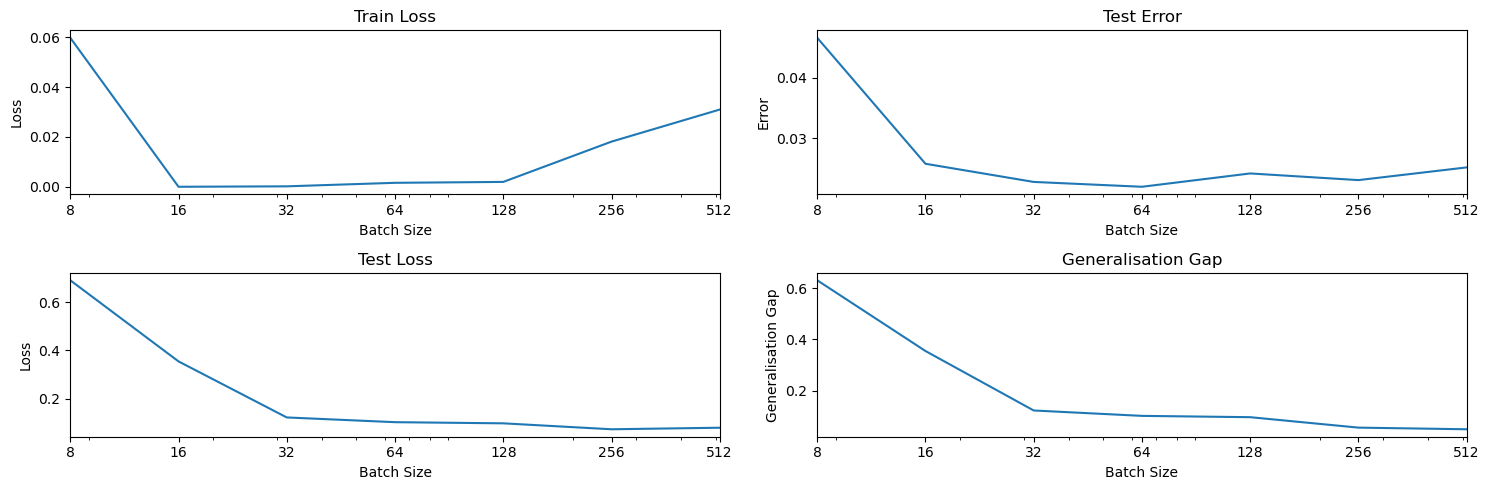

In [ ]:
#plot train and test loss against batch size
fig, ax = plt.subplots(2, 2, figsize=(15, 5))
ax[0,0].plot(batch_sizes, [float(n[-1]) for n in train_losses], label=f'Train Loss')
ax[1,0].plot(batch_sizes, [float(n[-1]) for n in test_losses], label=f'Test Loss')
ax[0,1].plot(batch_sizes, [float(n[-1]) for n in test_errors], label=f'Test Error')
ax[1,1].plot(batch_sizes, np.abs(np.array([float(n[-1]) for n in train_losses])-np.array([float(n[-1]) for n in test_losses])), label=f'Generalisation Gap')
ax[0,0].set_title('Train Loss')
ax[1,0].set_title('Test Loss')
ax[0,1].set_title('Test Error')
ax[1,1].set_title('Generalisation Gap')
#logscale x axis
ax[0,0].set_xscale('log')
ax[1,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[1,1].set_xscale('log')
#set axis limits
ax[0,0].set_xlim([min(batch_sizes), max(batch_sizes)])
ax[1,0].set_xlim([min(batch_sizes), max(batch_sizes)])
ax[0,1].set_xlim([min(batch_sizes), max(batch_sizes)])
ax[1,1].set_xlim([min(batch_sizes), max(batch_sizes)])
#set x ticks
ax[0,0].set_xticks(batch_sizes)
ax[1,0].set_xticks(batch_sizes)
ax[0,1].set_xticks(batch_sizes)
ax[1,1].set_xticks(batch_sizes)
#set axis labels
ax[0,0].set_xlabel('Batch Size')
ax[1,0].set_xlabel('Batch Size')
ax[0,0].set_ylabel('Loss')
ax[1,0].set_ylabel('Loss')
ax[0,1].set_xlabel('Batch Size')
ax[0,1].set_ylabel('Error')
ax[1,1].set_xlabel('Batch Size')
ax[1,1].set_ylabel('Generalisation Gap')
ax[0,0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[1,0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[0,1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[1,1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.tight_layout()

In [ ]:
#make table of these results
table = []
for i in range(len(batch_sizes)):
    table.append([batch_sizes[i], train_losses[i][-1], test_losses[i][-1], abs(train_losses[i][-1] - test_losses[i][-1])])

headers = ["Batch Size", "Train Loss", "Test Loss", "Generalisation Gap"]

print(tabulate(table, headers=headers, floatfmt=".4f", tablefmt="fancy_grid"))

╒══════════════╤══════════════╤═════════════╤══════════════════════╕
│   Batch Size │   Train Loss │   Test Loss │   Generalisation Gap │
╞══════════════╪══════════════╪═════════════╪══════════════════════╡
│            8 │       0.0598 │      0.6905 │               0.6307 │
├──────────────┼──────────────┼─────────────┼──────────────────────┤
│           16 │       0.0000 │      0.3544 │               0.3544 │
├──────────────┼──────────────┼─────────────┼──────────────────────┤
│           32 │       0.0002 │      0.1222 │               0.1221 │
├──────────────┼──────────────┼─────────────┼──────────────────────┤
│           64 │       0.0016 │      0.1026 │               0.1010 │
├──────────────┼──────────────┼─────────────┼──────────────────────┤
│          128 │       0.0019 │      0.0979 │               0.0959 │
├──────────────┼──────────────┼─────────────┼──────────────────────┤
│          256 │       0.0181 │      0.0732 │               0.0551 │
├──────────────┼──────────────┼───

Table of results:

| Batch Size | Train Loss | Test Loss | Generalisation Gap |
|------------|------------|-----------|--------------------|
| 8          | 0.0598     | 0.6905    | 0.6307             |
| 16         | 0.0000     | 0.3544    | 0.3544             |
| 32         | 0.0002     | 0.1222    | 0.1221             |
| 64         | 0.0016     | 0.1026    | 0.1010             |
| 128        | 0.0019     | 0.0979    | 0.0959             |
| 256        | 0.0181     | 0.0732    | 0.0551             |
| 512        | 0.0310     | 0.0797    | 0.0487             |


Report hyperparameter values:

| Hyperparameter | Value |
|----------------|-------|
| Learning Rate  | 0.01  |
| Width          | 64    |
| Depth          | 1     |
| Epochs         | 40    |
| Momentum       | 0.9   |

In Keskar et al., 2016, we can read the following:

"These methods operate in a small-batch regime wherein a fraction of the training data, say 32–512 data points, is sampled to compute an approximation to the gradient. It has been observed in practice that when using a larger batch there is a degradation in the quality of the model, as measured by its ability to generalize."

This may lead us to believe that batch size 8 to 512 are all consider to be a small batch size, and so there will not be much difference in the generalisation error between those batch sizes. 

This is why we see that there is not really a large change in the generalisation gap for our chosen batch sizes. 

We do observe a slight converse pattern. Namely, smaller batch sizes lead to a slightly higher generalisation gap.

Smaller batch sizes lead to more frequent updates to the model parameters, which can cause the model to fit the training data too closely and therefore overfit. This can lead to a decrease in the test loss at first, as the model becomes better at fitting the training data, but eventually the model will start to generalize poorly to unseen data, leading to an increase in the test loss. As we observe in the history for test loss, we see that batch sizes 8 and 16 are clearly overfitting.

In contrast, larger batch sizes result in less frequent updates to the model parameters, which can cause the model to learn more slowly and generalize better to unseen data. However, using very large batch sizes can also lead to poor generalization, as the model may get stuck in a suboptimal local minimum. However, since we have sufficiently calibrated learning rate and number of epochs, the larger batch size networks to tend to have enough time to converge. 

We also observe another interesting pattern that we have seen in previous tasks. For smaller batch sizes we see exploding gradients phenomena in the train loss history. Exploding gradients can occur when the gradients become too large during the training process, making it difficult for the optimization algorithm to converge to a good solution. The batch size can have an impact on the occurrence of exploding gradients in deep learning models.

When using a larger batch size, the gradient estimate for each parameter is computed based on more examples, which can help reduce the variance in the estimates. This can help to stabilize the training process and reduce the likelihood of exploding gradients.

On the other hand, when using a smaller batch size, the gradient estimate for each parameter is computed based on fewer examples, which can result in larger variance in the estimates. This can lead to more fluctuation in the gradients and increase the likelihood of exploding gradients.

The choice of batch size in deep learning has trade-offs in terms of computational efficiency.

Using larger batch sizes can speed up the training process, as the model takes fewer steps to cover the same amount of data. This can also result in better hardware utilization, as modern GPUs can more efficiently parallelize computations for larger batches. Additionally, larger batches can lead to more stable gradients, reducing the impact of noisy gradients and leading to faster convergence.

On the other hand, using smaller batch sizes requires more iterations to cover the same amount of data, which can slow down the training process. However, smaller batches can help to prevent the model from getting stuck in poor local minima and can result in better generalization performance.

In [ ]:
# Task 9
# Set seed
torch.manual_seed(int("01724711"))
np.random.seed(int("01724711"))
# Define hyperparameters
dim = 28*28
nclass = 10
batch_size = 4
depth = 1
lr = 0.001
n_epochs = 15
# Train and test the model for different learning rates
widths = [4, 8, 16, 32, 64, 128, 256, 512, 1024]
# Define lists to store the results
train_losses = [[] for _ in range(len(widths))]
test_losses = [[] for _ in range(len(widths))]
test_errors = [[] for _ in range(len(widths))]
for i, width in enumerate(widths):
    # Define the network
    net = Net(dim, nclass, width, depth)
    # Define the optimizer and criterion
    optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.3)
    criterion = nn.CrossEntropyLoss()
    # Load the data
    trainloader, testloader = load_data(batch_size, train_set=train_set, test_set=test_set)
    # Train and test the model for n_epochs
    for epoch in range(1, n_epochs+1):
        # Train for one epoch
        train_loss = train_epoch(trainloader, net, optimizer, criterion)
        # Test for one epoch
        test_loss, test_err = test_epoch(testloader, net, criterion)
        # Print the results for this epoch
        print(f'Epoch: {epoch:03} | Width: {width:02} | Train Loss: {train_loss:.04f} | Test Loss: {test_loss:.04f} | Test Error: {test_err:.04f}')
        # Record the train and test losses and test errors
        train_losses[i].append(train_loss)
        test_losses[i].append(test_loss)
        test_errors[i].append(test_err)

            


Epoch: 001 | Width: 04 | Train Loss: 0.4463 | Test Loss: 0.6958 | Test Error: 0.2131
Epoch: 002 | Width: 04 | Train Loss: 0.8110 | Test Loss: 0.6030 | Test Error: 0.1795
Epoch: 003 | Width: 04 | Train Loss: 0.0501 | Test Loss: 0.5548 | Test Error: 0.1644
Epoch: 004 | Width: 04 | Train Loss: 0.3226 | Test Loss: 0.5433 | Test Error: 0.1584
Epoch: 005 | Width: 04 | Train Loss: 0.3217 | Test Loss: 0.5244 | Test Error: 0.1551
Epoch: 006 | Width: 04 | Train Loss: 0.0659 | Test Loss: 0.5124 | Test Error: 0.1472
Epoch: 007 | Width: 04 | Train Loss: 0.2329 | Test Loss: 0.5066 | Test Error: 0.1445
Epoch: 008 | Width: 04 | Train Loss: 0.9401 | Test Loss: 0.5120 | Test Error: 0.1479
Epoch: 009 | Width: 04 | Train Loss: 0.0669 | Test Loss: 0.5023 | Test Error: 0.1448
Epoch: 010 | Width: 04 | Train Loss: 0.2678 | Test Loss: 0.5058 | Test Error: 0.1473
Epoch: 011 | Width: 04 | Train Loss: 0.2895 | Test Loss: 0.4999 | Test Error: 0.1483
Epoch: 012 | Width: 04 | Train Loss: 0.3078 | Test Loss: 0.4927 |

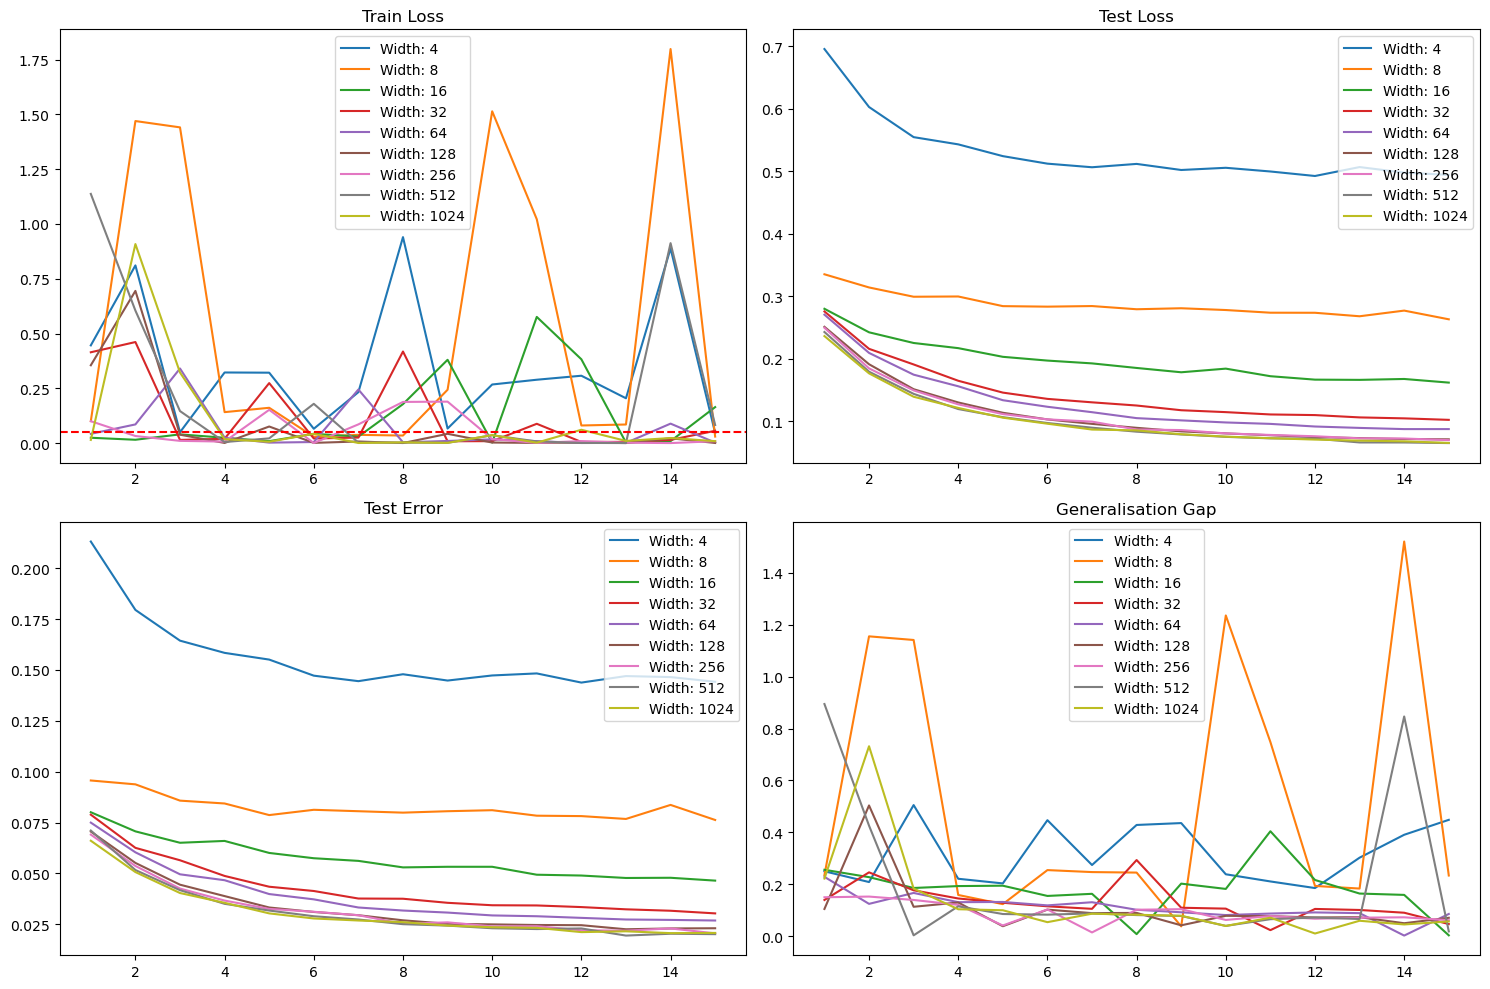

In [ ]:
#plot four graphs on same figure for train loss, test loss and test error and generalisation gap against epochs with depths as labels
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
for i, width in enumerate(widths):
    ax[0,0].plot(range(1, len(train_losses[i])+1),[float(n) for n in train_losses[i]], label=f'Width: {widths[i]}')
    ax[0,1].plot(range(1, len(test_losses[i])+1),[float(n) for n in test_losses[i]], label=f'Width: {widths[i]}')
    ax[1,0].plot(range(1, len(test_errors[i])+1),[float(n) for n in test_errors[i]], label=f'Width: {widths[i]}')
    ax[1,1].plot(range(1, len(train_losses[i])+1),np.abs(np.array([float(n) for n in train_losses[i]])-np.array([float(n) for n in test_losses[i]])), label=f'Width: {widths[i]}')
ax[0,0].axhline(y=0.05, color='r', linestyle='--')
ax[0,0].set_title('Train Loss')
ax[0,1].set_title('Test Loss')
ax[1,0].set_title('Test Error')
ax[1,1].set_title('Generalisation Gap')
ax[0,0].legend()
ax[0,1].legend()
ax[1,0].legend()
ax[1,1].legend()
plt.tight_layout()

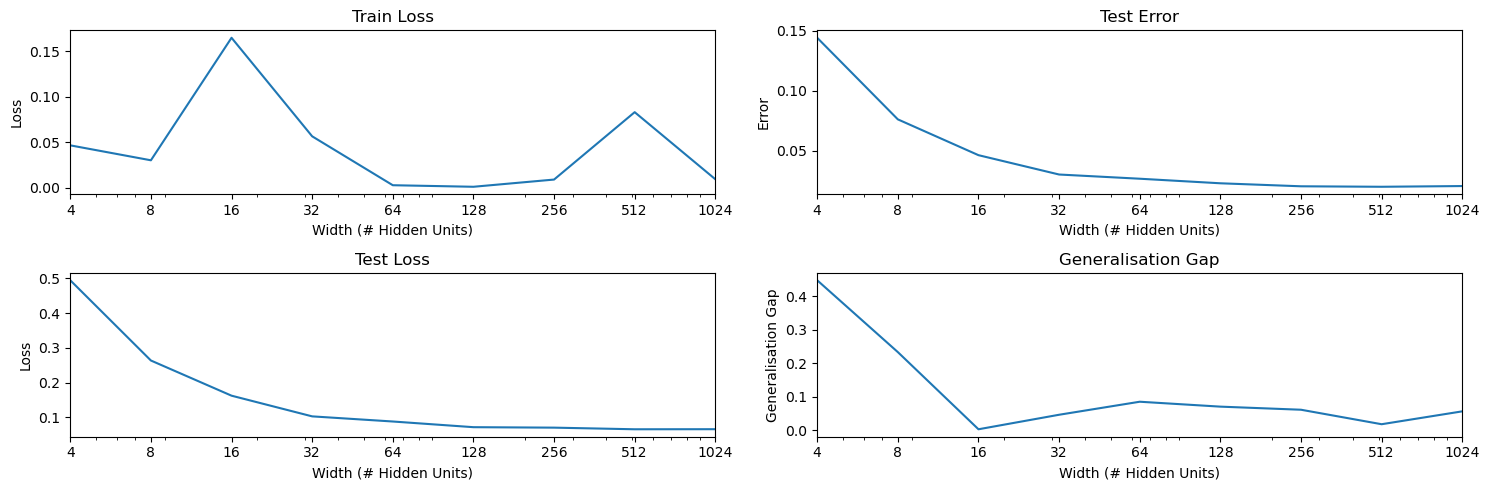

In [ ]:
#plot train and test loss against batch size
fig, ax = plt.subplots(2, 2, figsize=(15, 5))
ax[0,0].plot(widths, [float(n[-1]) for n in train_losses], label=f'Train Loss')
ax[1,0].plot(widths, [float(n[-1]) for n in test_losses], label=f'Test Loss')
ax[0,1].plot(widths, [float(n[-1]) for n in test_errors], label=f'Test Error')
ax[1,1].plot(widths, np.abs(np.array([float(n[-1]) for n in train_losses])-np.array([float(n[-1]) for n in test_losses])), label=f'Generalisation Gap')
ax[0,0].set_title('Train Loss')
ax[1,0].set_title('Test Loss')
ax[0,1].set_title('Test Error')
ax[1,1].set_title('Generalisation Gap')
#logscale x axis
ax[0,0].set_xscale('log')
ax[1,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[1,1].set_xscale('log')
#set axis limits
ax[0,0].set_xlim([min(widths), max(widths)])
ax[1,0].set_xlim([min(widths), max(widths)])
ax[0,1].set_xlim([min(widths), max(widths)])
ax[1,1].set_xlim([min(widths), max(widths)])
#set x ticks
ax[0,0].set_xticks(widths)
ax[1,0].set_xticks(widths)
ax[0,1].set_xticks(widths)
ax[1,1].set_xticks(widths)
#set axis labels
ax[0,0].set_xlabel('Width (# Hidden Units)')
ax[1,0].set_xlabel('Width (# Hidden Units)')
ax[0,0].set_ylabel('Loss')
ax[1,0].set_ylabel('Loss')
ax[0,1].set_xlabel('Width (# Hidden Units)')
ax[0,1].set_ylabel('Error')
ax[1,1].set_xlabel('Width (# Hidden Units)')
ax[1,1].set_ylabel('Generalisation Gap')
ax[0,0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[1,0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[0,1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax[1,1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.tight_layout()

In [ ]:
#make table of these results
table = []
for i in range(len(widths)):
    table.append([widths[i], train_losses[i][-1], test_losses[i][-1], abs(train_losses[i][-1] - test_losses[i][-1])])

headers = ["Width", "Train Loss", "Test Loss", "Generalisation Gap"]

print(tabulate(table, headers=headers, floatfmt=".4f", tablefmt="fancy_grid"))

╒═════════╤══════════════╤═════════════╤══════════════════════╕
│   Width │   Train Loss │   Test Loss │   Generalisation Gap │
╞═════════╪══════════════╪═════════════╪══════════════════════╡
│       4 │       0.0465 │      0.4944 │               0.4479 │
├─────────┼──────────────┼─────────────┼──────────────────────┤
│       8 │       0.0295 │      0.2836 │               0.2541 │
├─────────┼──────────────┼─────────────┼──────────────────────┤
│      16 │       0.0081 │      0.2157 │               0.2076 │
├─────────┼──────────────┼─────────────┼──────────────────────┤
│      32 │       0.0079 │      0.1346 │               0.1267 │
├─────────┼──────────────┼─────────────┼──────────────────────┤
│      64 │       0.0024 │      0.1111 │               0.1087 │
├─────────┼──────────────┼─────────────┼──────────────────────┤
│     128 │       0.0016 │      0.0777 │               0.0761 │
├─────────┼──────────────┼─────────────┼──────────────────────┤
│     256 │       0.0004 │      0.0705 │

Table of results:

| Width      | Train Loss | Test Loss | Generalisation Gap |
|------------|------------|-----------|--------------------|
| 4          | 0.0465     | 0.4944    | 0.4479             |
| 8          | 0.0295     | 0.2836    | 0.2541             |
| 16         | 0.0081     | 0.2157    | 0.2076             |
| 32         | 0.0079     | 0.1346    | 0.1267             |
| 64         | 0.0024     | 0.1111    | 0.1087             |
| 128        | 0.0016     | 0.0777    | 0.0761             |
| 256        | 0.0004     | 0.0705    | 0.0701             |
| 512        | 0.0030     | 0.0745    | 0.0728             |
| 1024       | 0.0017     | 0.0745    | 0.0728             |

Report hyperparameter values:

| Hyperparameter | Value |
|----------------|-------|
| Learning Rate  | 0.001 |
| Batch Size     | 4     |
| Depth          | 1     |
| Epochs         | 15    |
| Momentum       | 0.3   |

Again we observe the phenomenon of exploding gradients. Exploding gradients can occur when the magnitude of the gradients in the backpropagation algorithm becomes very large, leading to unstable updates of the network weights.

When the width of the neural network is small, there are fewer parameters in the network, and the interactions between the weights can become more pronounced. In such cases, the gradients can quickly amplify or explode, leading to unstable updates of the network weights during training.

The instability of the updates can cause the network to fail to converge to a good solution, leading to poor generalization performance. This can be a problem for small networks that are not able to capture the complexity of the underlying data distribution. 

The reason why we use small batch sizes is because they are preferred for small network widths is related to the properties of the optimization landscape. When the width of the network is small, the optimization problem becomes more ill-conditioned, with a higher likelihood of saddle points and poor gradient flow. This can make it difficult for the optimizer to find good solutions.

Using a smaller batch size means that each iteration of the optimizer is based on a smaller subset of the training data, which can help to reduce the noise in the gradient estimates and improve the stability of the optimization process. In other words, using smaller batch sizes can help to smooth out the optimization landscape and make it easier for the optimizer to find good solutions.

However, using smaller batch sizes can also lead to slower convergence, as each iteration of the optimizer is based on less data. This can be mitigated by increasing the learning rate or using other techniques to improve the efficiency of the optimizer.

Our results show that more parameters can indeed result in a lower test loss. The implicit bias of stochastic gradient descent allows wider networks to generalize well without overfitting, even when the number of parameters greatly exceeds the number of training examples. This has been demonstrated in several recent works, including "Understanding deep learning requires rethinking generalization" by Zhang et al. (2017), "Sharpness, Flatness and Generalization of Overparameterized Neural Networks" by Keskar et al. (2017) and Towards Understanding the Role of Over-Parametrization in Generalization of Neural Networks by Neyshabur et al. 2018. These works showed that for sufficiently wide neural networks, the generalization error does not increase with the number of parameters, as long as the networks are trained with stochastic gradient descent. The exact reason for this behavior is not fully understood, but it is believed to be related to the properties of the optimization landscape of neural networks.

Stochastic gradient descent (SGD) has been observed to have a regularizing effect, which can help prevent overfitting. One possible explanation for this effect is that SGD introduces some noise into the optimization process, which can help prevent the model from overfitting to the training data by pushing it towards smoother solutions.

Another way to think about the implicit bias of SGD is through the lens of the optimization landscape. SGD performs small updates to the model parameters based on randomly sampled mini-batches of data. This can cause the optimization process to explore different areas of the landscape, potentially helping to find flatter and more generalizable solutions.

Overall, while the exact mechanisms underlying the regularizing effect of SGD are not fully understood, it is clear that the use of stochasticity in the optimization process can be a powerful tool for preventing overfitting and promoting generalization in deep learning models.

When not having the implicit bias of SGD and using another optimizer such as Adam we do not see the pattern of decreasing test loss with larger width. With the Adam optimizer, adding more parameters to a model can lead to a higher test loss due to overfitting. Adam uses adaptive learning rates for each parameter, which can result in overfitting when the number of parameters is large.

When there are more parameters, the optimizer may adjust the learning rates for each parameter more aggressively to try to fit the training data better. This can lead to overfitting because the model becomes too specialized to the training data, and it does not generalize well to new data.

In contrast, with fewer parameters, the optimizer may be less likely to overfit because there is less capacity for the model to specialize to the training data. Therefore, in some cases, using a simpler model with fewer parameters can lead to better generalization performance with the Adam optimizer.

Standard generalization bounds such as the VC dimension-based bounds or Rademacher complexity-based bounds do not always capture the behavior of deep neural networks, which can continue to improve on the training set even after the test error starts to increase. This phenomenon is known as "double descent," where the test error first decreases as the model complexity (e.g., number of parameters) increases, then increases again before ultimately decreasing to zero as the model becomes even more complex.

The reason for this behavior is not fully understood, but it has been hypothesized that the overparameterization of deep neural networks allows them to capture more complex patterns in the data and generalize better, even if the model has many more parameters than training samples. Additionally, the optimization landscape of deep neural networks may have some desirable properties that allow them to avoid overfitting.

Therefore, using standard generalization bounds to assess the performance of deep neural networks may not always be appropriate, and other methods such as cross-validation or early stopping may be more effective in determining when a model starts to overfit.

10.

Which task do I think is easier to learn for a fully-connected neural network - MNIST or CIFAR10?

In general, I think MNIST to be an easier task for a fully-connected neural network than CIFAR10. This is because MNIST has smaller images (28x28 pixels) with less variability in the data, while CIFAR10 has larger images (32x32 pixels) with more complex patterns and color information.

It's worth noting that the choice of architecture, hyperparameters, and optimization algorithm have a significant impact on the performance of the network for both tasks.

Hyperparameters such as learning rate, batch size, and regularization strength can also greatly affect the performance of both fully connected networks on both datasets. For example, using a larger batch size may lead to faster convergence but can also result in a suboptimal solution. Similarly, using a high learning rate can cause the optimization to diverge or overshoot the optimal solution. The optimal hyperparameters depend on the specific dataset and architecture being used, and need to be tuned through experimentation.

Finally, the choice of optimization algorithm can also affect the performance of fully connected networks on both datasets. Stochastic gradient descent (SGD) is a widely used optimization algorithm that works well for most neural network architectures. However, other optimization algorithms such as Adam or RMSprop may work better for certain datasets and architectures. It is important to experiment with different optimization algorithms to find the one that works best for a specific task.

Fully connected networks are better suited for simpler tasks with low-dimensional input spaces, as they can easily learn the important features of the input and map them to the output. In contrast, convolutional neural networks (CNNs) are better suited for more complex tasks such as CIFAR, as they can effectively capture the spatial structure of the input data and learn more complex features.

In summary, fully connected networks can still be used for CIFAR, but they may struggle to learn the complex features and patterns in the input data that are necessary for good performance. CNNs, with their ability to capture spatial structure and learn complex features, are better suited for tasks like CIFAR.

In [ ]:
# Task 10
#download CIFAR10 dataset
train_set = torchvision.datasets.CIFAR10(
root="./",
download=True,
train=True,
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))]),
)
test_set = torchvision.datasets.CIFAR10(
root="./",
download=True,
train=False,
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))]),
)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Define hyperparameters
batch_size = 256
lr = 0.01
n_epochs = 20

# Define network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 64)
        self.fc6 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(p=0.6)
        self.flatten = nn.Flatten()
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.relu(self.fc5(x))
        x = self.dropout(x)
        x = self.fc6(x)
        return x

net = Net()

# Record the final train and test losses
train_losses = []
test_losses = []
test_errors = []

# Define the optimizer and criterion
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)
criterion = nn.CrossEntropyLoss()

# Define the learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Load the data
trainloader, testloader = load_data(batch_size, train_set=train_set, test_set=test_set)

# Train and test the model for n_epochs
for epoch in range(1, n_epochs+1):
    # Train for one epoch
    train_loss = train_epoch(trainloader, net, optimizer, criterion)
    # Test for one epoch
    test_loss, test_err = test_epoch(testloader, net, criterion)

    # Record the final train and test losses
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_errors.append(test_err)
    
    # Print the results for this epoch
    print(f'Epoch: {epoch:03} | Train Loss: {train_loss:.04f} | Test Loss: {test_loss:.04f} | Test Error: {test_err:.04f}')
    
    # Update the learning rate
    scheduler.step()
    
    if test_err < 0.42:
        break




Epoch: 001 | Train Loss: 2.2082 | Test Loss: 2.2202 | Test Error: 0.8204
Epoch: 002 | Train Loss: 1.9178 | Test Loss: 1.8940 | Test Error: 0.7156
Epoch: 003 | Train Loss: 1.6995 | Test Loss: 1.6784 | Test Error: 0.6024
Epoch: 004 | Train Loss: 1.3193 | Test Loss: 1.5050 | Test Error: 0.5385
Epoch: 005 | Train Loss: 1.3774 | Test Loss: 1.4225 | Test Error: 0.5029
Epoch: 006 | Train Loss: 1.1962 | Test Loss: 1.3715 | Test Error: 0.4844
Epoch: 007 | Train Loss: 1.1675 | Test Loss: 1.3469 | Test Error: 0.4731
Epoch: 008 | Train Loss: 0.9701 | Test Loss: 1.3458 | Test Error: 0.4654
Epoch: 009 | Train Loss: 1.2157 | Test Loss: 1.3657 | Test Error: 0.4749
Epoch: 010 | Train Loss: 0.9910 | Test Loss: 1.3438 | Test Error: 0.4628
Epoch: 011 | Train Loss: 0.9829 | Test Loss: 1.2753 | Test Error: 0.4297
Epoch: 012 | Train Loss: 0.8274 | Test Loss: 1.2904 | Test Error: 0.4320
Epoch: 013 | Train Loss: 0.6440 | Test Loss: 1.3143 | Test Error: 0.4333
Epoch: 014 | Train Loss: 0.6451 | Test Loss: 1.3296

TEST ACCURACY FINAL RESULT: 0.562 BEATS BASELINE OF 0.550
IMPROVEMENT IS 0.012 > 0.01


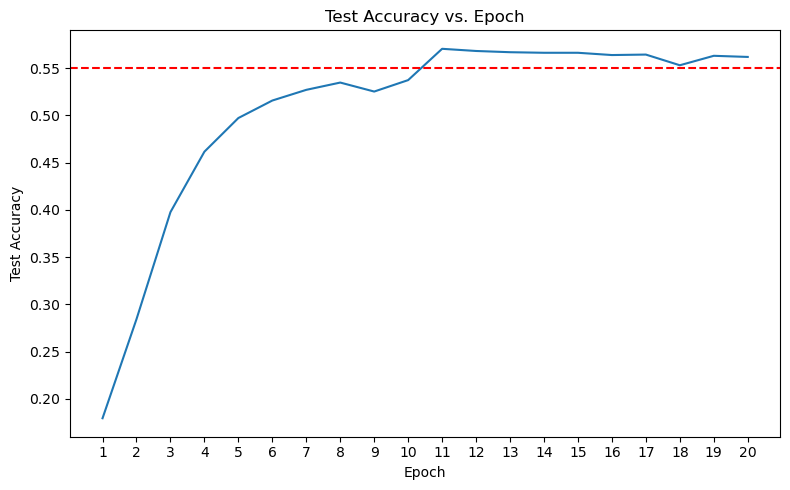

In [ ]:
#make plot of 1- test error with dashed line at 0.55 baseline
print(f"TEST ACCURACY FINAL RESULT: {1-np.array(test_errors)[-1]:.3f} BEATS BASELINE OF 0.550")
print(f"IMPROVEMENT IS {1-np.array(test_errors)[-1] - 0.55:.3f} > 0.01")
plt.figure(figsize=(8,5))
plt.plot(range(1, 21, 1), 1-np.array(test_errors))
plt.axhline(y=0.55, color='r', linestyle='--')
plt.title("Test Accuracy vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.xticks(np.arange(1,21, 1.0))
plt.tight_layout()

A brief explanation of why I designed my network as such.

Dropout is a regularization technique that is used in neural networks to prevent overfitting. Overfitting occurs when a model is too complex and fits the training data too closely, resulting in poor performance on new, unseen data. Dropout helps prevent overfitting by randomly dropping out (setting to zero) some of the units in a layer during training. This prevents the units from co-adapting too much and forces the remaining units to learn more robust features. In other words, dropout helps to "regularize" the network and improve its generalization performance on new data. Dropout has been shown to be effective in a variety of neural network architectures and tasks.

Decreasing the width of layers as we go through the network is often done to reduce the number of parameters in the model, which can help prevent overfitting and improve the model's generalization performance. By reducing the number of parameters, we are reducing the complexity of the model, which can help it learn more robust and generalizable representations of the input data.

Another reason to decrease the width of layers is to create a hierarchy of features. Lower layers of a neural network typically learn lower-level features such as edges and corners, while higher layers learn more complex features such as shapes and objects. By decreasing the width of layers as we go through the network, we are encouraging the network to learn more abstract and high-level features in the later layers, which can be useful for classification tasks.

Scheduling the learning rate can be helpful in improving the performance of a neural network during training. The idea behind learning rate scheduling is to gradually decrease the learning rate over time during training.

When the learning rate is too high, the optimizer may overshoot the optimal weight values, causing the loss to oscillate and preventing the model from converging. On the other hand, if the learning rate is too low, the optimizer may get stuck in local minima or take a long time to converge.

By scheduling the learning rate, we can start with a relatively high learning rate to ensure that the optimizer converges quickly in the early stages of training, and then decrease the learning rate over time to allow the optimizer to converge to a more optimal solution. This can result in faster convergence, better generalization, and better performance on the test set.